In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [4]:
x_begin, x_end, y_begin, y_end = 0, 1, 0, math.pi / 2
h_x, h_y = 0.01, 0.01

In [33]:
def read_txt_file(filename):
    with open(filename, 'r') as f:
        matrix = [np.array(list(map(float, line.split()))) for line in f]
    return np.array(matrix)

analytical_solution = read_txt_file("analytical_solution.txt")
iterative_method = read_txt_file("iterative_method.txt")
seidel_method = read_txt_file("seidel_method.txt")
relaxations_method = read_txt_file("relaxations_method.txt")

solutions = {
    'analytical_solution': analytical_solution,
    'iterative_method': iterative_method,
    'seidel_method': seidel_method,
    'relaxations_method': relaxations_method
}

In [35]:
def max_abs_error(A, B):
    return abs(A - B).max()

In [36]:
def plot_solutions(solutions, cur_y, x_range, y_range, h_x, h_y):
    x = np.arange(*x_range, h_x)
    y = np.arange(*y_range, h_y)
    cur_y_id = abs(y - cur_y).argmin()

    plt.figure(figsize=(15, 9))
    for method_name, solution in solutions.items():
        plt.plot(x, solution[:, cur_y_id], label=method_name)

    plt.legend()
    plt.grid()
    plt.show()

In [41]:
def plot_errors(solutions, y_range, h_y):
    y = np.arange(*y_range, h_y)

    plt.figure(figsize=(15, 9))
    for method_name, solution in solutions.items():
        max_abs_errors = np.array([
            max_abs_error(solution[:, i], solutions['analytical_solution'][:, i])
            for i in range(len(y))
        ])
        plt.plot(y, max_abs_errors, label=method_name)

    plt.xlabel('y')
    plt.ylabel('Max abs error')

    plt.legend()
    plt.grid()
    plt.show()

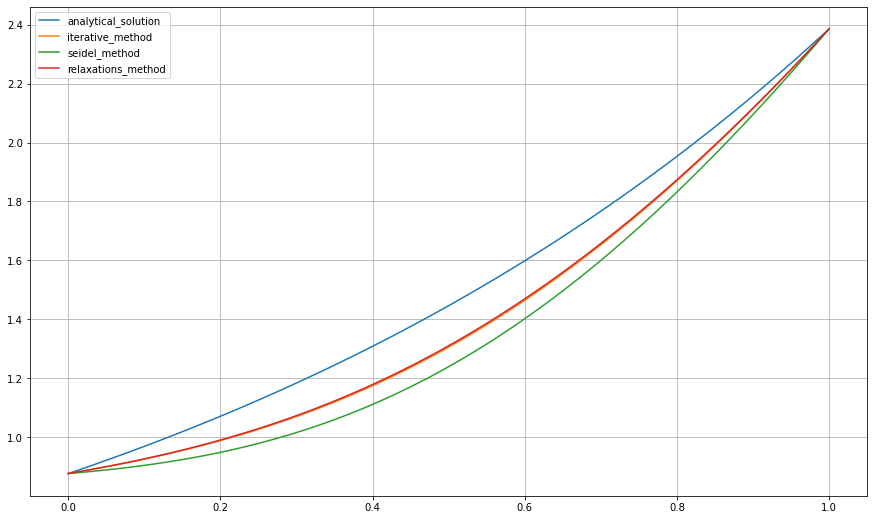

In [42]:
plot_solutions(solutions, 0.5, (x_begin, x_end + h_x), (y_begin, y_end), h_x, h_y)   

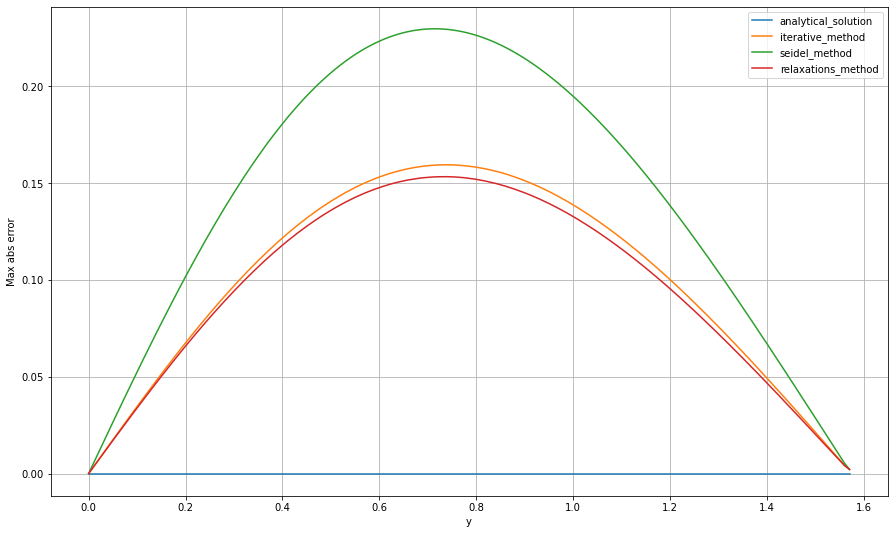

In [43]:
plot_errors(solutions, (y_begin, y_end), h_y)